In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./data/titanic_clean.csv')

In [4]:
df.sample(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
769,0,3,male,32.000000,0,0,8.3625,S
657,0,3,female,32.000000,1,1,15.5000,Q
77,0,3,male,29.699118,0,0,8.0500,S
459,0,3,male,29.699118,0,0,7.7500,Q


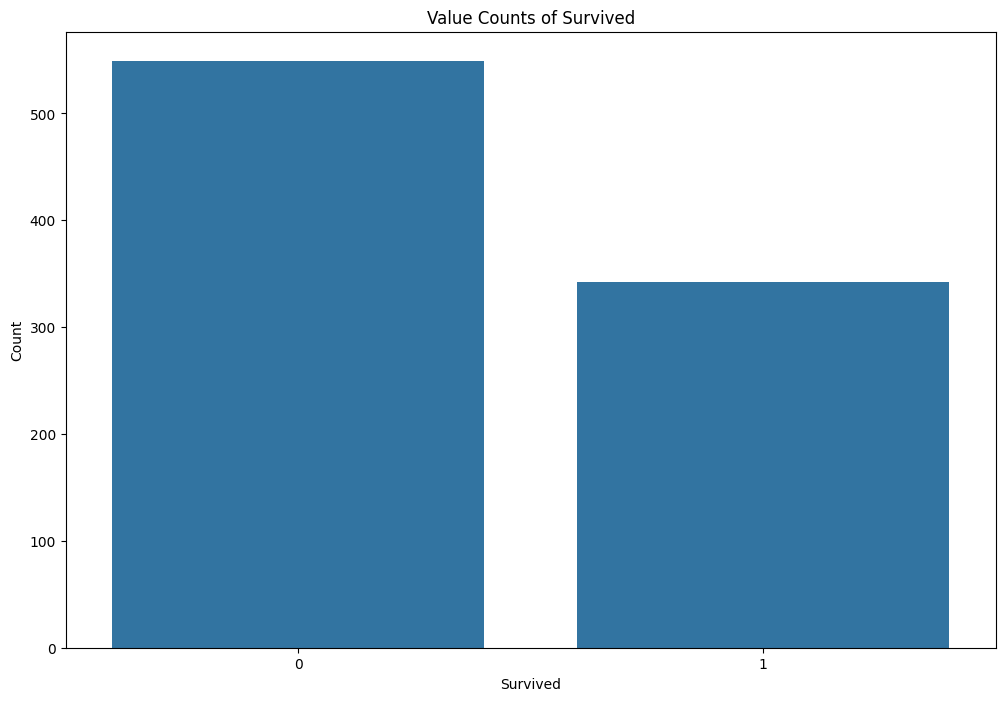

In [6]:
plt.figure(figsize=(12, 8))

sns.barplot(x = df['Survived'].value_counts().index, y = df['Survived'].value_counts())
plt.title('Value Counts of Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

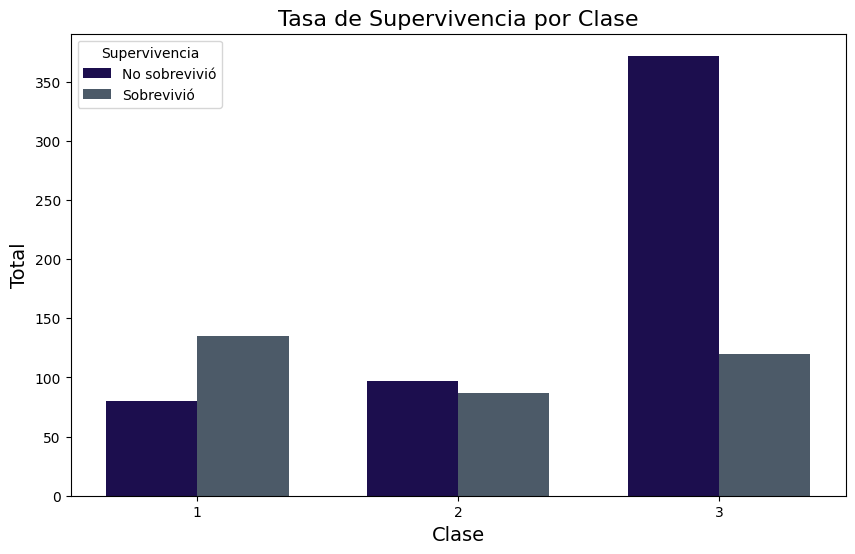

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Datos
clases = [1, 2, 3]
no_sobrevivio = [80, 97, 372]
sobrevivio = [135, 87, 120]

# Separación de barras
x = np.arange(len(clases))
width = 0.35

plt.figure(figsize=(10, 6)) # Ajusté un poco el tamaño para que quepa mejor en pantalla

# Barras
plt.bar(x - width/2, no_sobrevivio, width, label="No sobrevivió", color="#1C0E4E")
plt.bar(x + width/2, sobrevivio, width, label="Sobrevivió", color="#4C5A68")

# Títulos y etiquetas
plt.title("Tasa de Supervivencia por Clase", fontsize=16)
plt.xlabel("Clase", fontsize=14)
plt.ylabel("Total", fontsize=14)
plt.xticks(x, clases)

# Leyenda
plt.legend(title="Supervivencia")

plt.show()

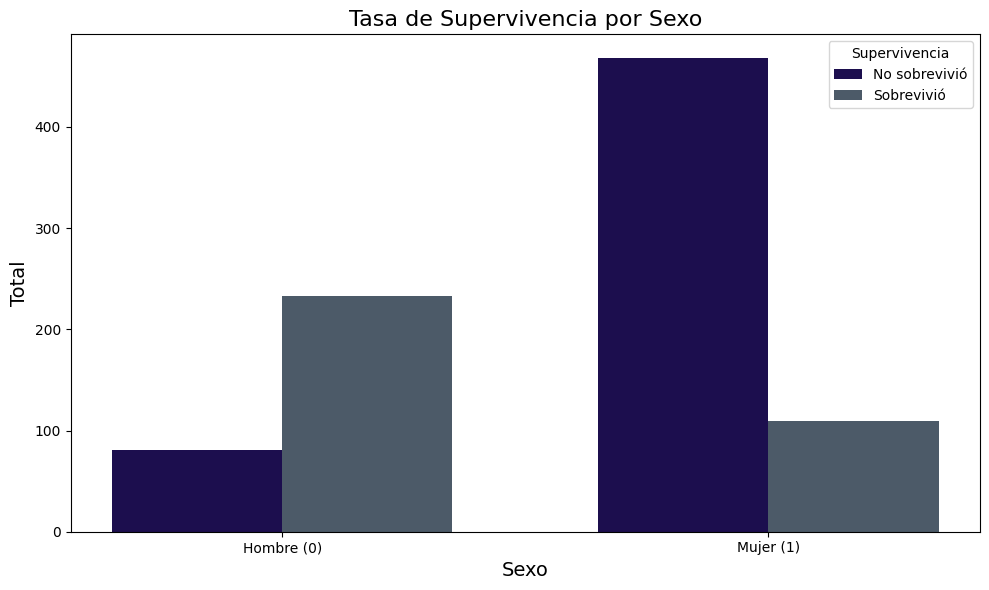

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Agrupamos los datos para obtener los conteos reales
# Esto cuenta cuántos sobrevivieron (1) y cuántos no (0) por cada sexo
conteo_sexo = df.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)

# 2. Configuración de los datos para la gráfica
labels = ['Hombre (0)', 'Mujer (1)'] # Ajusta según cómo estén tus datos
no_sobrevivio = conteo_sexo[0].values
sobrevivio = conteo_sexo[1].values

x = np.arange(len(labels))
width = 0.35

# 3. Creación de la gráfica
plt.figure(figsize=(10, 6))

plt.bar(x - width/2, no_sobrevivio, width, label='No sobrevivió', color='#1C0E4E')
plt.bar(x + width/2, sobrevivio, width, label='Sobrevivió', color='#4C5A68')

# 4. Personalización (Títulos y etiquetas)
plt.title('Tasa de Supervivencia por Sexo', fontsize=16)
plt.xlabel('Sexo', fontsize=14)
plt.ylabel('Total', fontsize=14)
plt.xticks(x, labels)

# 5. Leyenda y mostrar
plt.legend(title='Supervivencia')
plt.tight_layout() # Para que no se corten los bordes
plt.show()

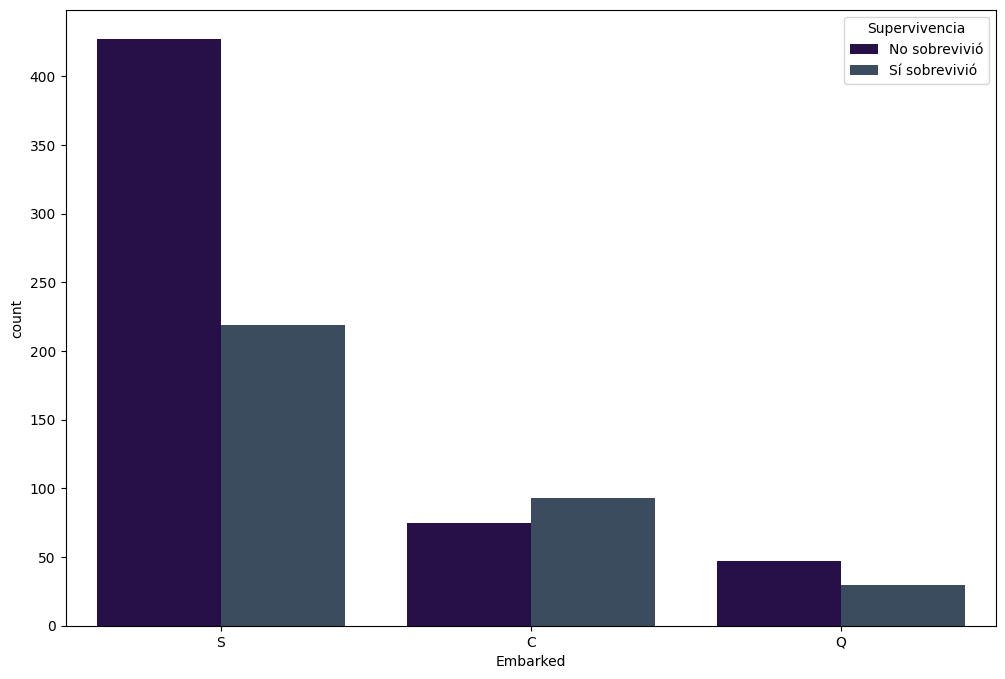

In [9]:
plt.figure(figsize = (12, 8))

# colores para cada una de las clases
color = ['#240750', '#344C64']

sns.countplot(df, x = 'Embarked', hue = 'Survived', palette=color) 
plt.legend(title = 'Supervivencia', labels = ['No sobrevivió', 'Sí sobrevivió'])
plt.show()

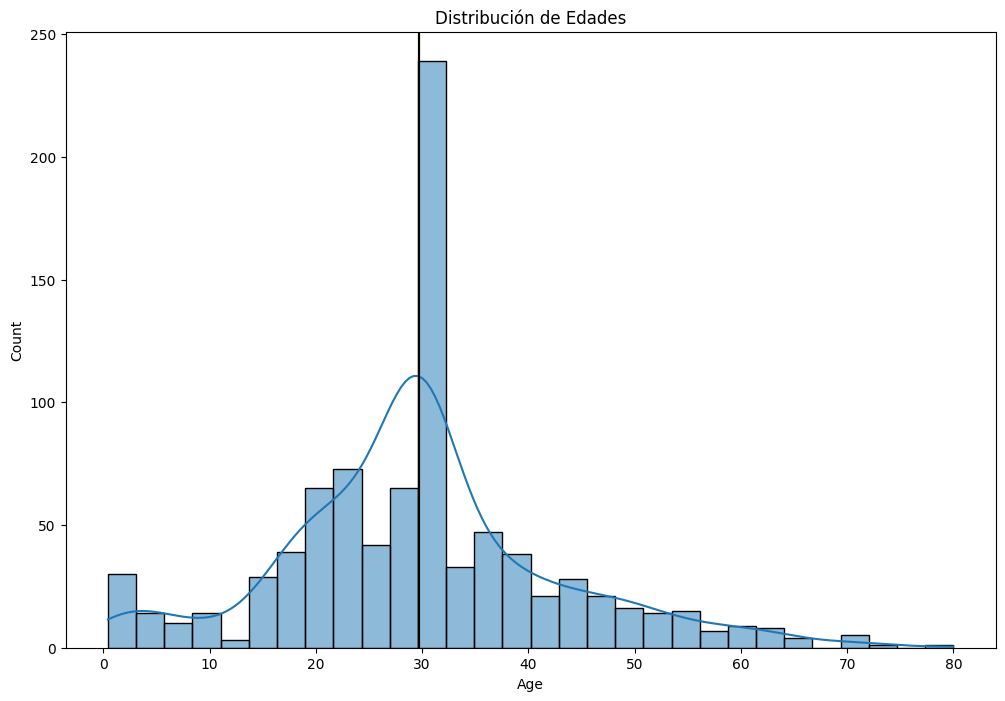

Media: 29.69911764705882
Mediana: 29.69911764705882
Moda: 29.69911764705882


In [10]:
plt.figure(figsize = (12, 8))

sns.histplot(df, x = 'Age', kde = True)
plt.title('Distribución de Edades')
plt.axvline(df['Age'].mean(), color = 'red')
plt.axvline(df['Age'].median(), color = 'green')
plt.axvline(df['Age'].mode()[0], color = 'black')
plt.show()

# Print the results
print(f"Media: {df['Age'].mean()}")
print(f"Mediana: {df['Age'].median()}")
print(f"Moda: {df['Age'].mode()[0]}")

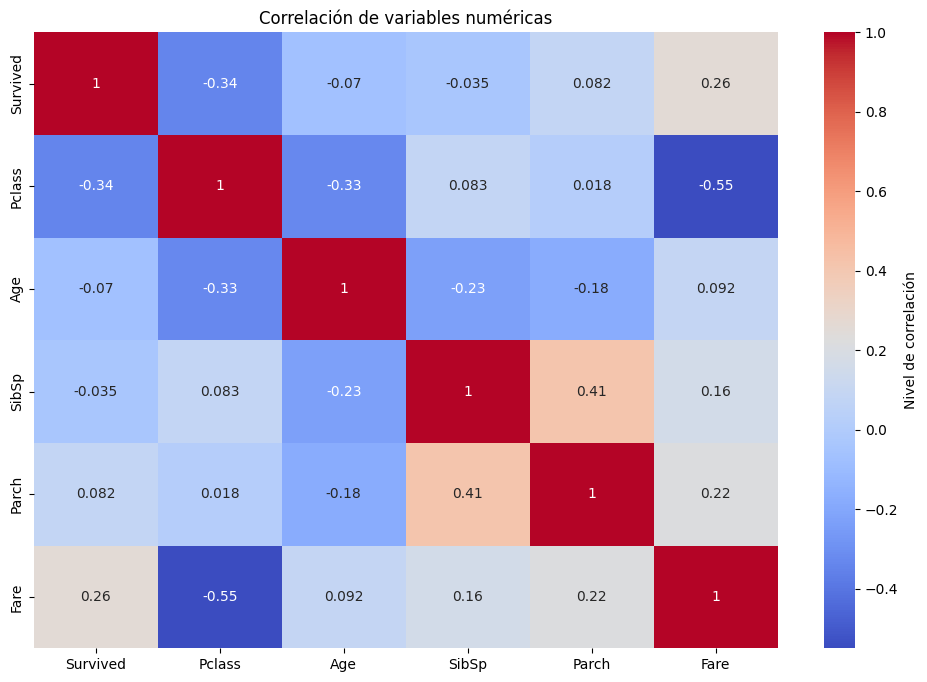

In [11]:
plt.figure(figsize = (12, 8))
sns.heatmap(df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), 
            annot=True, 
            cbar=True,  # Activar la barra de colores
            cmap='coolwarm',  # Cambiar la paleta de colores
            cbar_kws={'label': 'Nivel de correlación'})  # Etiqueta para la barra de colores
plt.title('Correlación de variables numéricas')
plt.show()

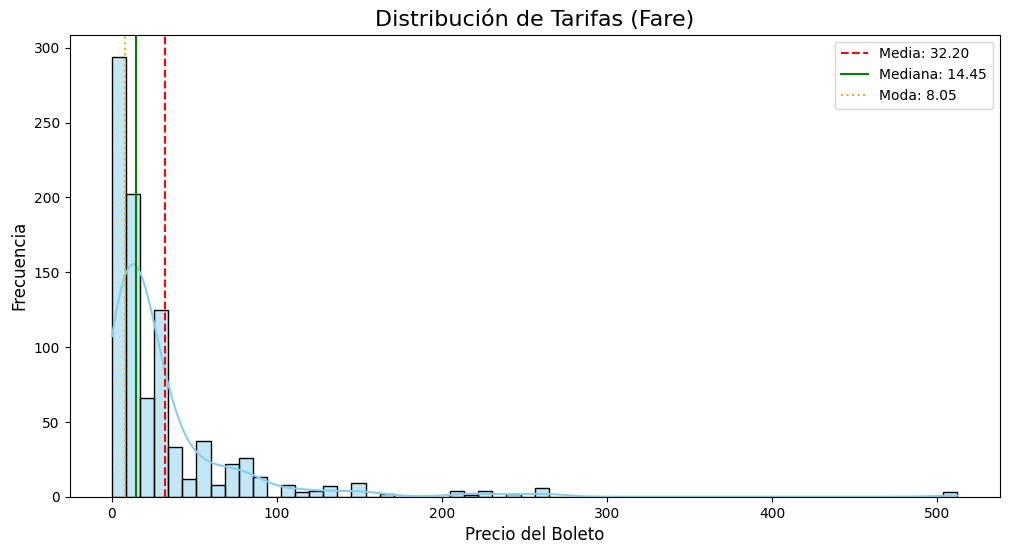

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calcular las estadísticas
mean_fare = df['Fare'].mean()
median_fare = df['Fare'].median()
mode_fare = df['Fare'].mode()[0]  # .mode() devuelve una serie, tomamos el primer valor

# 2. Crear la gráfica
plt.figure(figsize=(12, 6))
sns.histplot(df['Fare'], kde=True, color="skyblue")

# 3. Agregar líneas verticales
plt.axvline(mean_fare, color='red', linestyle='--', label=f'Media: {mean_fare:.2f}')
plt.axvline(median_fare, color='green', linestyle='-', label=f'Mediana: {median_fare:.2f}')
plt.axvline(mode_fare, color='orange', linestyle=':', label=f'Moda: {mode_fare:.2f}')

# 4. Personalización
plt.title('Distribución de Tarifas (Fare)', fontsize=16)
plt.xlabel('Precio del Boleto', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()

plt.show()

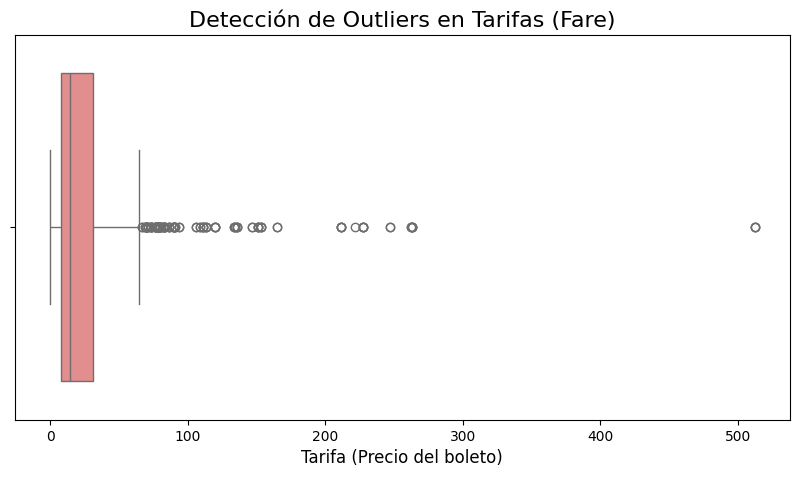

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el Boxplot para detectar valores atípicos (outliers)
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Fare'], color="lightcoral")

# Añadir títulos
plt.title('Detección de Outliers en Tarifas (Fare)', fontsize=16)
plt.xlabel('Tarifa (Precio del boleto)', fontsize=12)

plt.show()

Porcentaje de supervivencia por número de hermanos/cónyuges (SibSp):
SibSp
0    34.54%
1    53.59%
2    46.43%
3     25.0%
4    16.67%
5      0.0%
8      0.0%
Name: Survived, dtype: object


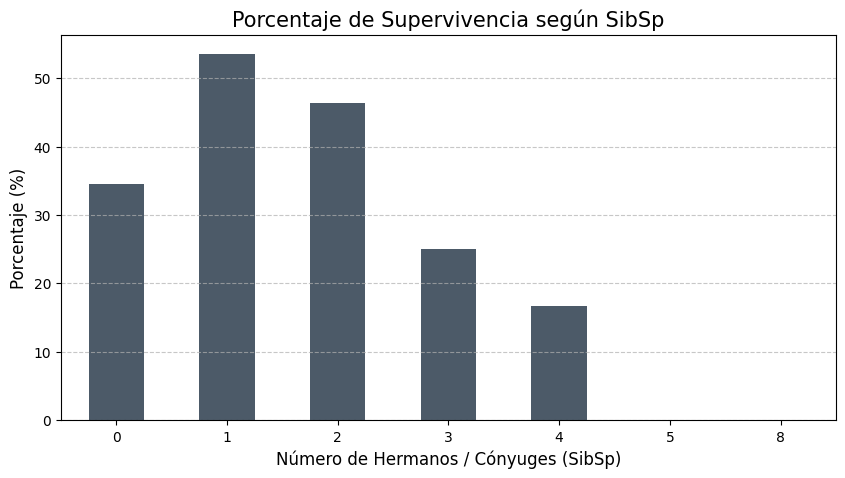

In [14]:
# 1. Agrupar por SibSp y calcular el promedio de supervivencia
# Multiplicamos por 100 para obtener el formato de porcentaje
supervivencia_sibsp = df.groupby('SibSp')['Survived'].mean() * 100

# 2. Mostrar los resultados de forma elegante
print("Porcentaje de supervivencia por número de hermanos/cónyuges (SibSp):")
print(supervivencia_sibsp.round(2).astype(str) + '%')

# 3. Opcional: Graficarlo para mejor visualización
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
supervivencia_sibsp.plot(kind='bar', color='#4C5A68')
plt.title('Porcentaje de Supervivencia según SibSp', fontsize=15)
plt.xlabel('Número de Hermanos / Cónyuges (SibSp)', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/var/folders/sx/tc7dtz310f7gsp2jkydzx02m0000gn/T/ipykernel_47117/1624476393.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasa_sibsp.index, y=tasa_sibsp.values, palette='viridis')


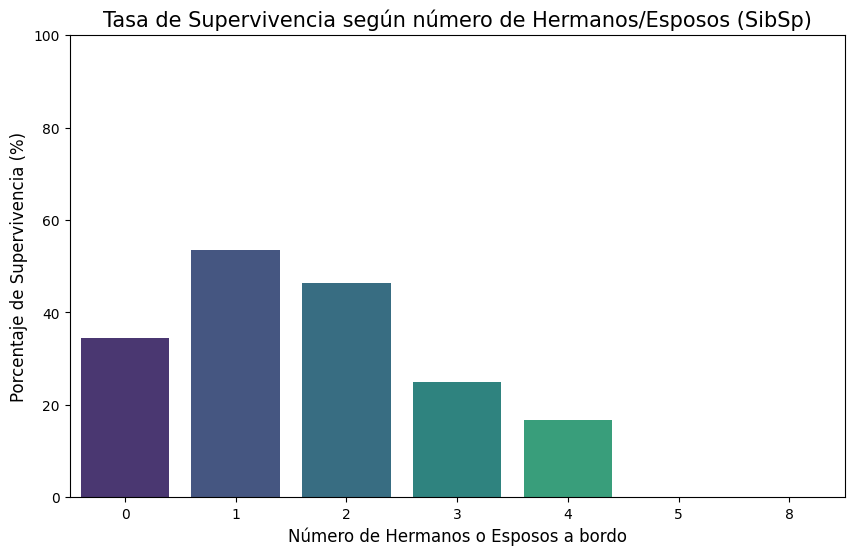

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculamos la tasa de supervivencia (promedio) por cada valor de SibSp
# Agrupamos por SibSp y sacamos el promedio de 'Survived'
tasa_sibsp = df.groupby('SibSp')['Survived'].mean() * 100

# 2. Crear la visualización
plt.figure(figsize=(10, 6))
# Usamos un gráfico de barras de Seaborn para que se vea más profesional
sns.barplot(x=tasa_sibsp.index, y=tasa_sibsp.values, palette='viridis')

# 3. Añadir detalles informativos
plt.title('Tasa de Supervivencia según número de Hermanos/Esposos (SibSp)', fontsize=15)
plt.xlabel('Número de Hermanos o Esposos a bordo', fontsize=12)
plt.ylabel('Porcentaje de Supervivencia (%)', fontsize=12)
plt.ylim(0, 100) # Forzamos el eje Y de 0 a 100 para ver el porcentaje real

# 4. Mostrar el gráfico
plt.show()

/var/folders/sx/tc7dtz310f7gsp2jkydzx02m0000gn/T/ipykernel_47117/1159437994.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SibSp', data=df, palette='magma')


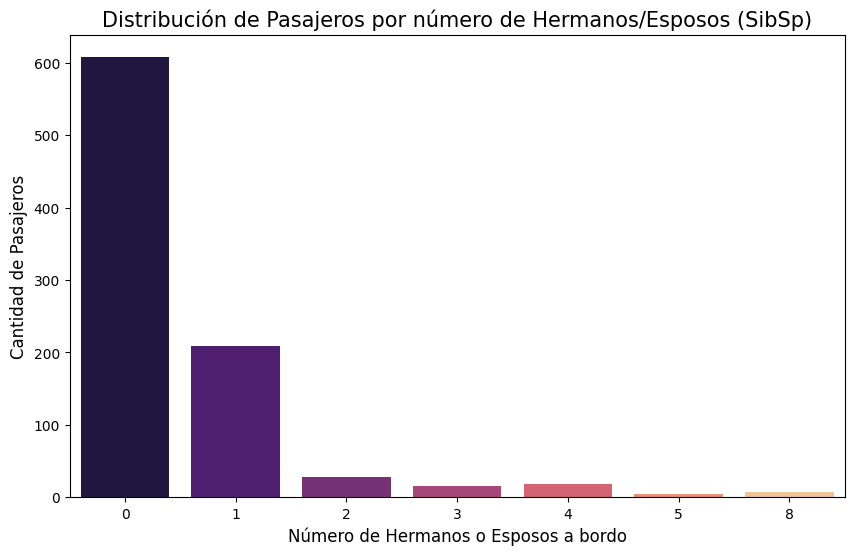

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la gráfica de conteo
plt.figure(figsize=(10, 6))
sns.countplot(x='SibSp', data=df, palette='magma')

# Añadir títulos y etiquetas
plt.title('Distribución de Pasajeros por número de Hermanos/Esposos (SibSp)', fontsize=15)
plt.xlabel('Número de Hermanos o Esposos a bordo', fontsize=12)
plt.ylabel('Cantidad de Pasajeros', fontsize=12)

# Mostrar la gráfica
plt.show()

In [17]:
# Filtramos el DataFrame donde la columna 'Fare' sea exactamente 0
pasajeros_gratis = df[df['Fare'] == 0]

# Mostramos el resultado
print(f"Total de pasajeros que pagaron 0: {len(pasajeros_gratis)}")
pasajeros_gratis

Total de pasajeros que pagaron 0: 15


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
179,0,3,male,36.000000,0,0,0.0,S
263,0,1,male,40.000000,0,0,0.0,S
271,1,3,male,25.000000,0,0,0.0,S
277,0,2,male,29.699118,0,0,0.0,S
302,0,3,male,19.000000,0,0,0.0,S
413,0,2,male,29.699118,0,0,0.0,S
466,0,2,male,29.699118,0,0,0.0,S
481,0,2,male,29.699118,0,0,0.0,S
597,0,3,male,49.000000,0,0,0.0,S
633,0,1,male,29.699118,0,0,0.0,S


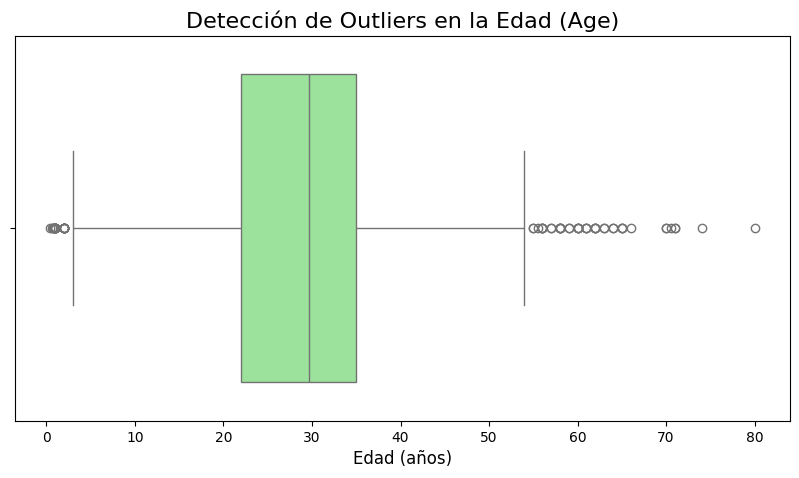

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el Boxplot para la columna Age
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Age'], color="lightgreen")

# Personalizar títulos y etiquetas
plt.title('Detección de Outliers en la Edad (Age)', fontsize=16)
plt.xlabel('Edad (años)', fontsize=12)

plt.show()

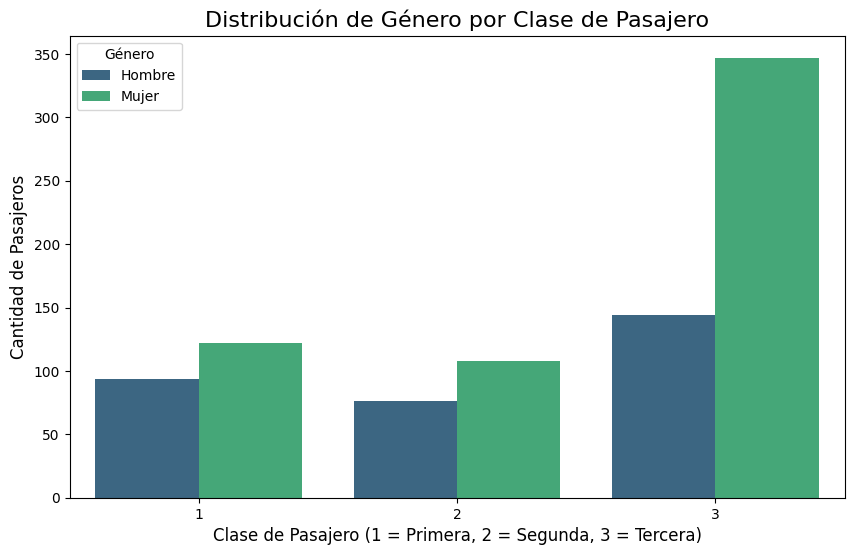

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la gráfica de conteo agrupada por Clase y Género
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Sex', data=df, palette='viridis')

# Personalización de la gráfica
plt.title('Distribución de Género por Clase de Pasajero', fontsize=16)
plt.xlabel('Clase de Pasajero (1 = Primera, 2 = Segunda, 3 = Tercera)', fontsize=12)
plt.ylabel('Cantidad de Pasajeros', fontsize=12)
plt.legend(title='Género', labels=['Hombre', 'Mujer']) # Ajusta etiquetas si tus datos son texto

plt.show()

/var/folders/sx/tc7dtz310f7gsp2jkydzx02m0000gn/T/ipykernel_47117/3706913221.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df, palette='Set2')


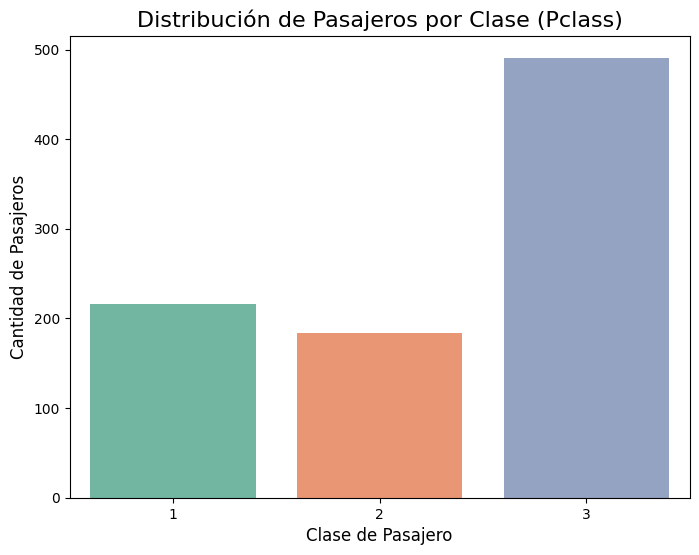

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la gráfica de conteo por clase
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=df, palette='Set2')

# Personalización
plt.title('Distribución de Pasajeros por Clase (Pclass)', fontsize=16)
plt.xlabel('Clase de Pasajero', fontsize=12)
plt.ylabel('Cantidad de Pasajeros', fontsize=12)

# Mostrar la gráfica
plt.show()

/var/folders/sx/tc7dtz310f7gsp2jkydzx02m0000gn/T/ipykernel_47117/267070335.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tasa_edad = df.groupby('Grupo_Edad')['Survived'].mean() * 100
/var/folders/sx/tc7dtz310f7gsp2jkydzx02m0000gn/T/ipykernel_47117/267070335.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasa_edad.index, y=tasa_edad.values, palette='coolwarm')


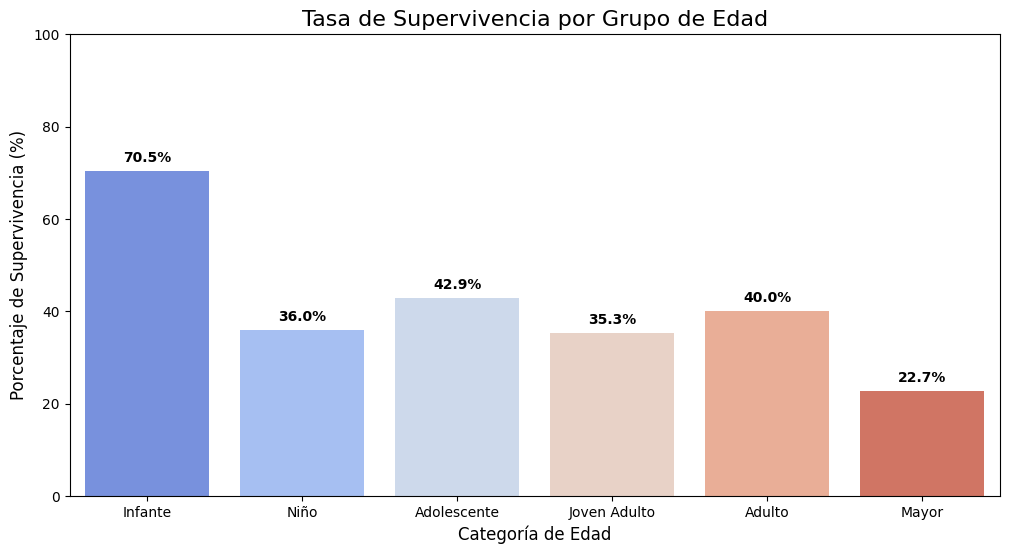

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Definir los cortes de edad y las etiquetas
bins = [0, 5, 12, 18, 35, 60, 100]
nombres_grupos = ['Infante', 'Niño', 'Adolescente', 'Joven Adulto', 'Adulto', 'Mayor']

# 2. Crear la nueva columna 'Grupo_Edad'
df['Grupo_Edad'] = pd.cut(df['Age'], bins=bins, labels=nombres_grupos)

# 3. Calcular la tasa de supervivencia por grupo
tasa_edad = df.groupby('Grupo_Edad')['Survived'].mean() * 100

# 4. Crear la gráfica
plt.figure(figsize=(12, 6))
sns.barplot(x=tasa_edad.index, y=tasa_edad.values, palette='coolwarm')

# Personalización
plt.title('Tasa de Supervivencia por Grupo de Edad', fontsize=16)
plt.xlabel('Categoría de Edad', fontsize=12)
plt.ylabel('Porcentaje de Supervivencia (%)', fontsize=12)
plt.ylim(0, 100)

# Añadir los valores encima de las barras
for i, v in enumerate(tasa_edad.values):
    plt.text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

plt.show()